# Yelp Data Challenge - Clustering and PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('data/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,type,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-06-26,0,nCqdz-NW64KazpxqnDr0sQ,1,I mainly went for the ceasar salad prepared ta...,review,0,0XVzm4kVIAaH4eQAxWbhvw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,review,0,2aeNFntqY2QDZLADNo8iQQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-04-05,0,2HrBENXZTiitcCJfzkELgA,2,To be honest it really quit aweful. First the ...,review,0,WFhv5pMJRDPWSyLnKiWFXA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-02-16,0,6YNPXoq41qTMZ2TEi0BYUA,2,"The food was decent, but the service was defin...",review,0,2S6gWE-K3DHNcKYYSgN7xA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-02-08,1,4bQrVUiRZ642odcKCS0OhQ,2,If you're looking for craptastic service and m...,review,1,rCTVWx_Tws2jWi-K89iEyw


## 1. Cluster the review text data for all the restaurants

In [4]:
# Take the values of the column that contains review text data
documents = df['text'].values 

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [5]:
# Make a column and take the values
df['perfection'] = df['stars'].apply(lambda x : int(x == 5))
target = df['perfection'].values

#### Look at the statistic of the target variable

In [6]:
target.mean(),target.shape


(0.46076595352958266, (347619,))

### Create training dataset and test dataset

In [7]:
from sklearn.cross_validation import train_test_split

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
documents_train, documents_test, target_train, target_test = train_test_split(documents, target, 
                                                                              test_size=0.8, random_state=42)

### Get NLP representation of the documents

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# Create TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features = 1000)

In [11]:
# Train the model with training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [12]:
# Get the vocab of tfidf
words = vectorizer.get_feature_names()

In [13]:
# Use the trained model to transform all the reviews
vectors_all = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all  data

In [15]:
assigned_cluster = kmeans.predict(vectors_all)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.

In [16]:
print "cluster centers:"
print kmeans.cluster_centers_

cluster centers:
[[ 0.00337159  0.00684302  0.00164322 ...,  0.00157069  0.00244199
   0.00765274]
 [ 0.00256369  0.00801464  0.00241301 ...,  0.00060816  0.00342729
   0.0067543 ]
 [ 0.00216754  0.00810863  0.00162009 ...,  0.00156751  0.00703803
   0.0100752 ]
 ..., 
 [ 0.00237309  0.00586968  0.00241838 ...,  0.00132061  0.00441404
   0.00724778]
 [ 0.00477644  0.01954789  0.00292402 ...,  0.00348316  0.00079302
   0.00174514]
 [ 0.00214876  0.00507666  0.00180902 ...,  0.00149254  0.00287365
   0.00579855]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.

* Sort each centroid vector to find the top 10 features
* Go back to vectorizer object to find out what words each of these features corresponds to.


In [17]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(words[i] for i in centroid))

top features for each cluster:
0: pizza, crust, place, great, good, best, slice, cheese, just, ordered
1: burger, fries, burgers, good, cheese, shake, place, great, food, just
2: chicken, fried, food, good, rice, place, ordered, great, delicious, sauce
3: great, food, service, place, amazing, awesome, friendly, love, staff, atmosphere
4: sushi, roll, place, rolls, great, ayce, fresh, eat, good, service
5: food, place, best, vegas, delicious, amazing, love, service, like, time
6: food, order, time, minutes, just, service, came, got, didn, table
7: good, food, really, place, service, nice, pretty, like, just, time


#### Try different k


In [18]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(words[i] for i in centroid))

top features for each cluster:
0: good, food, really, place, service, nice, pretty, like, just, time
1: amazing, food, place, service, great, best, vegas, love, definitely, delicious
2: breakfast, eggs, place, great, food, good, coffee, pancakes, service, vegas
3: chicken, fried, food, good, rice, place, ordered, great, sauce, delicious
4: food, order, minutes, time, service, just, came, table, got, asked
5: pizza, crust, place, good, great, best, slice, cheese, just, order
6: burger, fries, burgers, good, cheese, shake, place, great, food, just
7: great, food, service, place, awesome, friendly, love, atmosphere, staff, good
8: food, place, vegas, best, like, delicious, just, love, service, time
9: sushi, roll, rolls, place, ayce, great, fresh, eat, good, service


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [20]:
assigned_cluster = kmeans.predict(vectors_all)

In [106]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_all.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print "cluster %d:" % i
    for reviews in sample_reviews:
        print 'rate:%d -' % df.ix[reviews]['stars'],
        print "    %s" % df.ix[reviews]['text']


cluster 0:
rate:1 -     My co-workers and I placed an order for delivery today from store #691 or maryland pkwy.  We were completely dissatisfied.  We placed our order online at approximately 12:45 with a promise delivery time of 1:30.  After about 3 minutes we received a phone call asking would it be ok for our delivery time to be between 2 and 2:15.  We agreed to the revised time.  At approximately 2:35 we called the store to inquire what was taking so long.  We were told that the food was on the way and that there was no estimated time of arrival.  Totally unprofessional!  We then called a second time at 3:15 and spoke to the assistant manager who informed us the delivery was 2 minutes away.  When we finally received our food it was cold.  This is very unprofessional and unacceptable!  The avocado on the turkey sandwich had begun to turn brown and the bread on the muffaletta was soggy from sitting so long.  The manager didn't even have the decency to offer us any type of compensatio

## 2. Cluster all the reviews of the most reviewed restaurant

In [22]:
df['count'] = 1
df_count = df.groupby('business_id').sum()
top_review_business = df_count['count'].argmax()
df_top_restaurant = df[df['business_id'] == top_review_business]

In [107]:
df_top_restaurant

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,type,useful,user_id,perfection,count
258158,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-10-01,0,xgeXscn1gdG5I9w-p2tqig,5,Excellent food with great service that's near ...,review,1,mtGw8bQTQToVR_1KWD7F7A,1,1
258159,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-08-20,0,jHeg2v19v4RsN2UnDlCsFQ,5,We were in town for the weekend and really enj...,review,0,RVGxGRTnVOeCLMPT4JAYuw,1,1
258160,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2015-05-23,0,Gd26BHrDr-6uh2nyA8q5TQ,5,Yum yum yum this place is so good I love every...,review,0,q4DPOg5VPygvIEqWbvT8FA,1,1
258161,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,1,2015-11-21,1,UtE7cxs402ZeuXJbjVTB9g,5,We came here for happy hour and I was starving...,review,3,h_c7PjnpUnF_-LAegBv7CA,1,1
258162,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-04-15,0,5InDLk1xQJmg6IqLcowW4Q,5,Service was great very attentive staff. Food w...,review,0,K_kaV4WlOr2RxGUxNuwdqA,1,1
258163,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-11-11,0,G6EpvRrtUbzxUVzyk8qsAw,5,"Wow!!!this restaurant is on my top five best, ...",review,0,TIFzeoY3JqWmZjFBbeOYiw,1,1
258164,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-03-03,0,FMlrcrKxc9SZHx3J2CbGOQ,5,This place never fail for big party and meat l...,review,0,4ywi4cK7V4CZNtrL1XqfJQ,1,1
258165,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2015-12-13,0,UyEeuM000fMqV6bQSsIQqA,5,"The food was delicious, service was speedy, re...",review,0,IJHf-VprrPACRMD-jSHenA,1,1
258166,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2015-08-24,0,aB4i-vIbPCuUg4Sr4jz3DQ,3,This is one of the better korean bbq restauran...,review,0,nJRtRgvelFCcyzKyT3wfrg,0,1
258167,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-10-15,0,j_skfznARdMJvzWG1hy38w,4,"This was our first meal in Vegas and really, n...",review,1,INPppZR6jwq_oR5u88ObuA,0,1


### Vectorize the text feature

In [24]:
documents_top_restaurant = df_top_restaurant['text'].values

### Define target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [25]:
df_top_restaurant['perfection'] = df_top_restaurant['stars'].apply(lambda x : int(x == 5))
target_top_restaurtant = df_top_restaurant['perfection'].values

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Check the statistic of the target variable

In [26]:
target_top_restaurtant.mean()


0.76463262764632622

### Create training dataset and test dataset

In [27]:
from sklearn.cross_validation import train_test_split

In [28]:
documents_train, documents_test, target_train, target_test = train_test_split(
    documents_top_restaurant, target_top_restaurtant, test_size=0.3, random_state=42)

### Get NLP representation of the documents

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
stop.add(u"food")
stop.add(u"good")
stop.add(u"service")
stop.add(u"place")

In [31]:
# Create TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop,max_features=1000)

In [32]:
# Train the model with training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [33]:
# Get the vocab of tfidf
words = vectorizer.get_feature_names()


In [34]:
# Use the trained model to transform the test data
vectors_test = vectorizer.transform(documents_test).toarray()

In [35]:
# Use the trained model to transform all the data
vectors_all = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [36]:
kmeans = KMeans(n_clusters=3,max_iter=2000,random_state=42)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all data

In [37]:
assigned_cluster = kmeans.predict(vectors_all)


In [38]:
from sklearn.metrics import silhouette_score
silhouette_score(vectors_all, assigned_cluster)


0.0071246225482234707

#### Inspect the centroids

In [39]:
# To be implemented
kmeans.cluster_centers_


array([[  6.28837260e-18,   6.27907115e-03,  -9.75781955e-18, ...,
          1.44932237e-03,   8.64116609e-03,   9.50944802e-04],
       [  1.08095514e-03,   6.19831156e-03,   2.96083002e-03, ...,
          1.33149214e-03,   5.60763137e-03,   1.62630326e-18],
       [  1.22078657e-03,   5.16713630e-03,   1.69289860e-03, ...,
          5.31414842e-03,   9.35027413e-03,   1.18206335e-03]])

#### Find the top 10 features for each cluster.

In [40]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(words[i] for i in centroid))

top features for each cluster:
0: great, back, come, time, definitely, amazing, first, really, delicious, vegas
1: korean, bbq, best, vegas, las, great, restaurant, ever, one, quality
2: meat, great, beef, delicious, ordered, really, dishes, nice, happy, korean


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [41]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(df_top_restaurant.index[0], df_top_restaurant.index[-1]+1)[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print "cluster %d:" % i
    for reviews in sample_reviews:
        print 'rate: %d:' % df_top_restaurant.ix[reviews]['stars']
        print "    %s" % df_top_restaurant.ix[reviews]['text']



cluster 0:
rate: 5:
    We are very satisfied with our experience here! The bugolgi especially is very delicious and flavourful, and so is the salmon bacon! This place is a must try! We will definitely be back!
rate: 5:
    Amazing sides.  Amazing meat. Grilled!

This place is great.   Two visits in my three day visits to Vegas.
rate: 3:
    First time trying this place. My friends loved it. It was an ok experience for me. The bulgogi was really amazing and well flavored. The other meat was ok. Overall if you love Korean BBQ with a bunch of different meats and vegetables this place is definitely for you.
cluster 1:
rate: 5:
    Best Korean BBQ hands down. Really friendly staff and a trendy atmosphere. Really good quality meats and all side dishes were very fresh! Miso paste soup was to die for. The menu is huge with a really nice selection. I love that you can order a al carte style. If ever in the mood for Korean I'll definitely come back.
rate: 5:
    Best Korean restaurant in Vegas.

## 3. Use PCA to reduce dimensionality

### Stardardize features

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vectors_train_scaled = scaler.fit_transform(vectors_train)
vectors_test_scaled = scaler.fit_transform(vectors_test)



### Use PCA to transform data (train and test) and get princial components

In [43]:
from sklearn.decomposition import PCA

# pick a n_components
n_components = 50

pca = PCA(n_components = n_components)
train_components = pca.fit_transform(vectors_train_scaled)
test_components = pca.transform(vectors_test_scaled)



In [44]:
train_components.shape

(2810, 50)

### See how much (and how much percentage of) variance the principal components explain

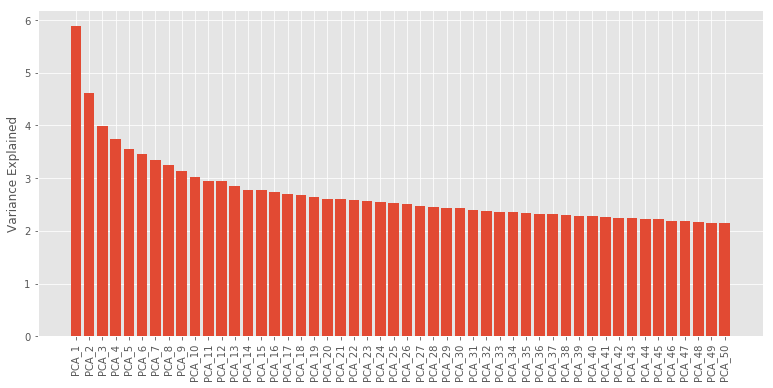

In [45]:
pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

fig, ax = plt.subplots(figsize=(13,6))
ax.bar(pca_range, pca.explained_variance_, align='center')

ax.set_xticks(pca_range)
ax.set_xticklabels(pca_names,rotation =90)
ax.set_ylabel('Variance Explained')


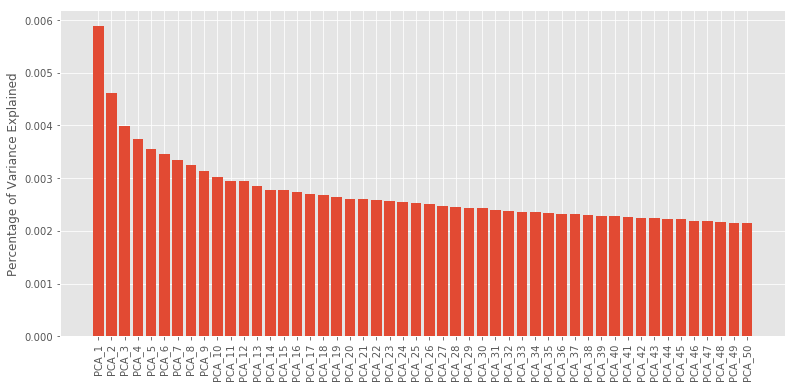

In [46]:
pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

fig, ax = plt.subplots(figsize=(13,6))
ax.bar(pca_range, pca.explained_variance_ratio_, align='center')

ax.set_xticks(pca_range)
ax.set_xticklabels(pca_names,rotation =90)
ax.set_ylabel('Percentage of Variance Explained')



### Viz: plot proportion of variance explained with top principal components


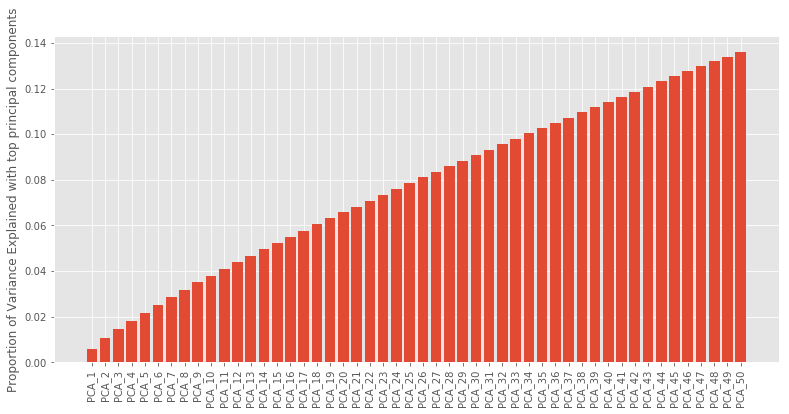

In [47]:

pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

fig, ax = plt.subplots(figsize=(13,6))
ax.bar(pca_range, np.cumsum(pca.explained_variance_ratio_), align='center')

ax.set_xticks(pca_range)
ax.set_xticklabels(pca_names,rotation =90)
ax.set_ylabel('Proportion of Variance Explained with top principal components')



## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [48]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(vectors_train_scaled,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Get score for training set
lr.score(vectors_train_scaled,target_train)

0.9711743772241993

In [50]:
# Get score for test set
lr.score(vectors_test_scaled,target_test)

0.68796680497925311

#### Use (Stardardized + PCA) tf-idf vectors as features

In [51]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
lr_pca = LogisticRegression()
lr_pca.fit(train_components,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
# Get score for training set
lr_pca.score(train_components,target_train)

0.80640569395017792

In [53]:
# Get score for test set, REMEMBER to use PCA-transformed X!
lr_pca.score(test_components,target_test)

0.78423236514522821

Comments: Without PCA, the model overfits the training set. With PCA, the model does not overfit.

#### Plot the coefficients against principal components


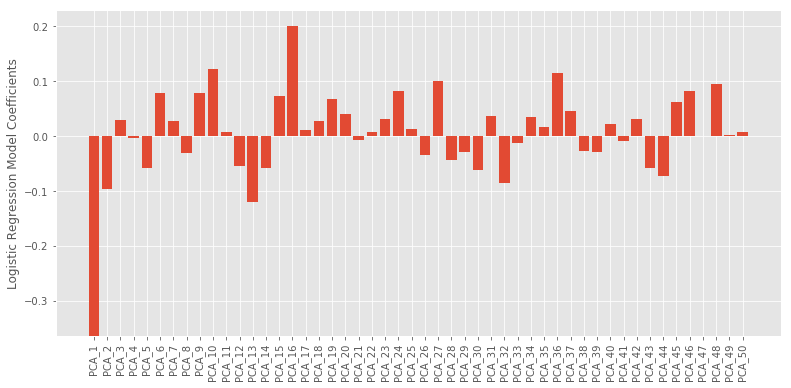

In [54]:
pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

fig, ax = plt.subplots(figsize=(13,6))
ax.bar(pca_range, lr_pca.coef_[0], align='center')

ax.set_xticks(pca_range)
ax.set_xticklabels(pca_names,rotation =90)
ax.set_ylabel('Logistic Regression Model Coefficients')



### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [55]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(vectors_train_scaled,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
# Get score for training set
rf.score(vectors_train_scaled,target_train)

0.99288256227758009

In [57]:
# Get score for test set
rf.score(vectors_test_scaled,target_test)

0.77178423236514526

#### Use (Stardardized + PCA) tf-idf vectors as features

In [58]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_pca = RandomForestClassifier()
rf_pca.fit(train_components,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [59]:
# Get score for training set
rf_pca.score(train_components,target_train)

0.9907473309608541

In [60]:
# Get score for test set
rf_pca.score(test_components,target_test)

0.76597510373443989

In [61]:
rf_pca.feature_importances_

array([ 0.08478956,  0.03077596,  0.02090383,  0.01487199,  0.01905859,
        0.02416132,  0.0189291 ,  0.01790462,  0.01673686,  0.03227241,
        0.01497985,  0.02207383,  0.01903185,  0.01174993,  0.01707134,
        0.02242941,  0.01821779,  0.01254587,  0.0183739 ,  0.01408027,
        0.02019037,  0.01721269,  0.01983474,  0.0214117 ,  0.01578269,
        0.0139524 ,  0.02194591,  0.01225971,  0.01587733,  0.02102611,
        0.01250005,  0.02022572,  0.01901666,  0.02448498,  0.02175809,
        0.02091044,  0.01592863,  0.01365634,  0.01644001,  0.01628258,
        0.0176677 ,  0.02005792,  0.01768186,  0.01240476,  0.01914922,
        0.02271843,  0.01992806,  0.02512342,  0.01366288,  0.01995034])

Comments: Using random forest model, overfitting is not fixed with PCA.

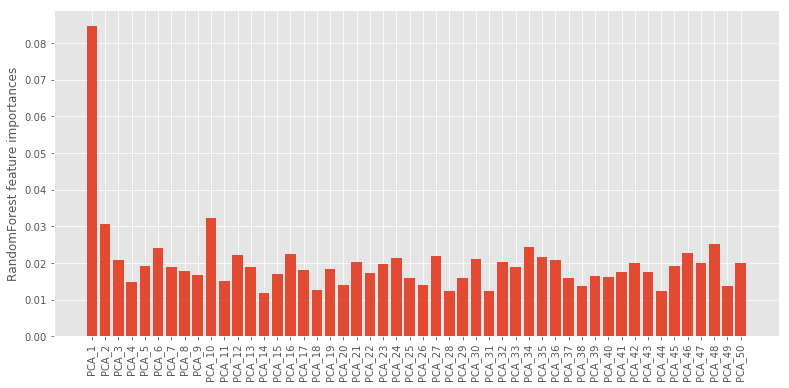

In [62]:
pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

fig, ax = plt.subplots(figsize=(13,6))
ax.bar(pca_range, rf_pca.feature_importances_ , align='center')

ax.set_xticks(pca_range)
ax.set_xticklabels(pca_names,rotation =90)
ax.set_ylabel('RandomForest feature importances')



## Cluster restaurants from their category information

In [63]:
documents_category = df['categories'].values
documents_category_train, documents_category_test = train_test_split(documents_category,test_size=0.8, random_state=42)

In [74]:
stop_catg = set(stopwords.words('english'))
stop_catg.add(u"restaurants")
vectorizer_catg = TfidfVectorizer(stop_words=stop_catg)

In [75]:
vectors_catg_train = vectorizer_catg.fit_transform(documents_category_train).toarray()

In [76]:
vectors_catg_all = vectorizer_catg.transform(documents_category).toarray()

In [104]:
words_catg = vectorizer_catg.get_feature_names()


In [81]:
kmeans_catg = KMeans(n_clusters= 10, max_iter=1000)
kmeans_catg.fit(vectors_catg_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [82]:
assigned_catg_cluster = kmeans_catg.predict(vectors_catg_all)


In [83]:
top_centroids_catg = kmeans_catg.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids_catg):
    print "%d: %s" % (num, ", ".join(words_catg[i] for i in centroid))

top features for each cluster:
0: food, burgers, steakhouses, fast, thai, seafood, tea, sandwiches, cafes, services
1: american, new, traditional, burgers, steakhouses, seafood, food, southern, sandwiches, desserts
2: chinese, dim, sum, asian, fusion, cantonese, noodles, thai, taiwanese, vietnamese
3: bars, nightlife, american, wine, new, sports, cocktail, traditional, beer, pubs
4: pizza, italian, food, wings, chicken, sandwiches, salad, seafood, delis, services
5: sushi, japanese, bars, fusion, asian, seafood, steakhouses, food, nightlife, salad
6: buffets, breakfast, brunch, sandwiches, food, american, brazilian, traditional, new, steakhouses
7: korean, barbeque, fusion, asian, japanese, tapas, plates, small, hawaiian, thai
8: breakfast, brunch, american, traditional, new, sandwiches, food, burgers, diners, cafes
9: mexican, nightlife, bars, fast, lounges, food, seafood, flavor, local, vegan


In [84]:
for i in range(kmeans_catg.n_clusters):
    cluster = np.arange(df.index[0], df.index[-1]+1)[assigned_catg_cluster==i]
    sample_catg = np.random.choice(cluster, 3, replace=False)
    print "cluster %d:" % i
    for catg in sample_catg:
        print "    %s" % df.ix[catg]['categories']




cluster 0:
    [Steakhouses, Spanish, Restaurants, Tapas/Small Plates]
    [Steakhouses, Spanish, Restaurants, Tapas/Small Plates]
    [French, Food, Bakeries, Restaurants]
cluster 1:
    [Burgers, American (Traditional), Restaurants, Pizza]
    [Restaurants, Burgers, Bars, American (Traditional), Nightlife, American (New)]
    [American (New), American (Traditional), Social Clubs, Restaurants, Arts & Entertainment, Desserts, Food]
cluster 2:
    [Restaurants, American (New), Asian Fusion, Chinese]
    [Restaurants, Chinese]
    [Restaurants, Chinese]
cluster 3:
    [Cocktail Bars, Nightlife, Bars, Restaurants, Steakhouses]
    [Nightlife, American (New), Bars, Restaurants]
    [Automotive, Car Dealers, Restaurants, Thai, Bars, Wine Bars, Nightlife]
cluster 4:
    [Italian, Restaurants]
    [Restaurants, Sandwiches, Pizza, Italian, Gluten-Free, Food, Food Delivery Services]
    [Pizza, Restaurants]
cluster 5:
    [Sushi Bars, Japanese, Asian Fusion, Restaurants, Salad]
    [Restaurants